# Introduction

This time, again, we will be working with decision trees in order to make a classification predictions.

We will perform the following steps:

1. Load data
2. Divide into training and testing
3. Tune model on training data
4. Final prediction on testing
5. Model visualization

Your task will be to fill parts with 

> ...

Sometimes you'll have to write full code including some functions, sometimes just fill parameters.

# Libraies import

In [2]:
import pandas as pd
import sklearn.model_selection as modsel
import sklearn.metrics as metr
import matplotlib.pyplot as plt
import sklearn.tree as trees

from sklearn.tree import DecisionTreeClassifier

C:\Users\fwojcik\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\fwojcik\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\fwojcik\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Reading data

In [3]:
data = pd.read_csv("./iris.csv")

In [5]:
# Print top 10 rows of a dataset

data. ...

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Divide dataset into X and Y - independent and dependent variables

In [4]:
X, Y = data.drop("species", axis=1), data.species

# Split into training and testing

Remember, that you always have to split data into training and testing part. Testing is left for final evaluation and should not be considered.

* Use **random seed** to ensure that experiment is reproducible!!! We should all get similar reuslts then :D 
* Use test size = 0.2


In [5]:
RANDOM_SEED = 10
TEST_SIZE = 0.2

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

Inspect the data to check if it was splitted correctly?

In [8]:
X_train.shape

(120, 4)

In [9]:
X_test.shape

(30, 4)

In [10]:
y_train.shape

(120,)

In [11]:
y_test.shape

(30,)

Check how many classes of each type to we have in our dataset? It will be important, when we have to select evaluation metric:

* Display information as table - present normalized % share of each class
* Make a pie plot of proportions

In [16]:
pd.value_counts(y_test, normalize=True)

versicolor    0.433333
setosa        0.333333
virginica     0.233333
Name: species, dtype: float64

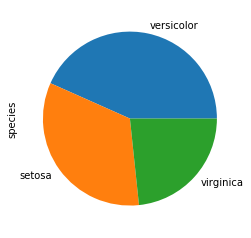

In [18]:
pd.value_counts(y_test, normalize=True).plot(kind='pie')

Answer a question - are proportions balanced? Can we use accuracy?

# Evaluate decision tree on training set

Use cross-validation to check performance of a decision tree. Play with parmeters to get the best results.

Use different performance metrics to check fit quality!

Remember: **use only training data, not testing - that one should be kept for final evaluation!!!**

In [13]:
dt = DecisionTreeClassifier()
scores = modsel.cross_val_score(dt, X_train, y_train )

C:\Users\fwojcik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Display information about achieved scores and make a boxplot

In [19]:
pd.Series(scores).describe()

count    3.000000
mean     0.916972
std      0.052361
min      0.871795
25%      0.888278
50%      0.904762
75%      0.939560
max      0.974359
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x17c217a29b0>],
 'caps': [<matplotlib.lines.Line2D at 0x17c21d663c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x17c21b14080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x17c21d66c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17c217a2b00>,
  <matplotlib.lines.Line2D at 0x17c217a2f60>]}

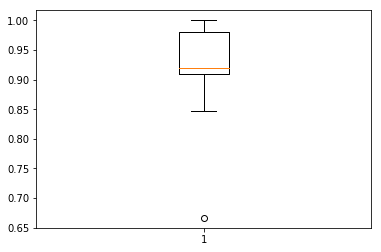

In [36]:
plt.boxplot(scores)

You can choose parameters manually or optimize them using grid search

In [ ]:
params_grid = {
    'max_depth': [ ... ], 
    'min_samples_split': [2], 
    'min_samples_leaf': [1], 
    'max_features': [None, ...] 
}

In [39]:
grid_search = modsel.GridSearchCV(...)

Grid search behaves like a model - you can fit it **to the training data**

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_features': [None, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Check best params:

In [ ]:
grid_search. ...

In [41]:
best_model = grid_search.best_estimator_

# Final prediction on test data

Now we're ready to test our model on **test dataset**. This should be our last operation.

In [42]:
results = ...

Check metrics:

In [44]:
accuracy = ...
accuracy

Let's visualize our final decision tree!

In [57]:
dot_data = trees.export_graphviz(best_model, out_file='result_tree.dot') 
# Open file result_tree.dot and copy-paste its content on this website: http://webgraphviz.com/

Those people, who work on their own laptops with MacOS/Linux, can download **graphviz** and install it:

```{bash}
pip install grapviz

sudo apt-get install graphviz
```

And then execute normally:

```{python}

import graphviz 
dot_data = trees.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
```


# Radnom forest

Random forests are so called **ensemble models**, which are composed of several simpler models - in this case, decision trees. 

* Dataset is sampled several times with repetitions. Every time a new decision tree is trained. It is saved for a later time
* Once all decision trees are trained, Radnom Forest is ready
* When it comes to predcition - new data set is fed to each (partial) decision tree. Each tree makes a classification. 
* In the end - voting happens, and classification result with most votes wins :)


In pracice, using Random Forest is very simple. 

In [9]:
from sklearn.ensemble import RandomForestClassifier

Random forest has couple of important features that you have to tune:

1. **n_estimators/Number of trees** - the more trees you have, the better predictions (probably), but also train time will be longer
2. **max_features/Number of features** - "random" in the name means, that Random Forest algorithm selects some subset of features (columns). You have to decide how many
3. **max_depth/Tree depth** - the longer are trees, the more complicated decision rules. It might be good sometimes, but can also lead to overfitting
3. **n_jobs** - each decision tree is independent. Therefore you can train them in parallel (multicore). You can decide how many nodes you want to use.

Try to tune Random Forest by checking multiple parameter values and compare your results with decision trees:

* Compare F1 score
* Compare Accuracy

In [ ]:
...